# Keras: The functional way.

Import everything we need. Keras has an awesome way to organise things and everything is right where it is supposed to be ... almost.
***

In [1]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.layers import Conv2D,Dense,Input,Flatten,MaxPool2D
from keras.models import Model

Using TensorFlow backend.


Then import a few helpers

In [2]:
import matplotlib.pyplot as plt
import numpy

And now to import the dataset. This is usually a long process. You always need to write code to get data into the pipeline. But since MNIST is like the 'Hello World!' of deep learning, keras provides us with a single function to get the MNIST data into a 60:40 split.

In [3]:
(train_x,train_y),(test_x,test_y)=mnist.load_data()

Lets have a peek at what the data looks like.

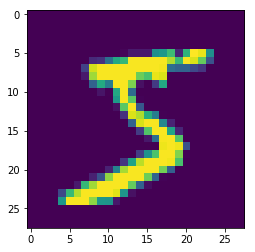

In [4]:
plt.imshow(train_x[0])
plt.show()

Now, keras uses the format (batches,height,width,channels) for its CNN layers. But the MNIST dataset is in the format (batches,height,width) since there is only one channel. So we manually need to add the additional axis on the dataset. 

Also the targets are in the form of integers. But keras needs targets in form of one-hot encoded vectors. (PyTorch is so awesome! It implicitly does the one-hot encoding). So we are going to convert the integer labels to one-hot vectors.

In [5]:
X,y=train_x[:,:,:,numpy.newaxis],to_categorical(train_y,10)

## Building the model.

Now this is the regular CNN model. But instead of declaring a Sequential() wrapper for the keras model and then adding layers to it one by one, we are building the model in a functional way. 
In the end of the model definition, keras has to be told which layers are the inputs and which layers are the output. The last line of the following code does that.

In [6]:
inputs=Input(shape=(28,28,1))
input_layer=Conv2D(filters=3,kernel_size=(2,2),activation='relu')(inputs)
second_layer=Conv2D(filters=3,kernel_size=(2,2),activation='relu')(input_layer)
max_pool=MaxPool2D(pool_size=(2,2))(second_layer)
flatten=Flatten()(max_pool)
flat_layer=Dense(8*8*3,activation='relu')(flatten)
output_layer=Dense(10,activation='softmax')(flat_layer)
model=Model(inputs=inputs,outputs=output_layer)

Since we are using tensorflow on the backend. The graph has to be statically compiled first before it is actually run. Keras provides an abstraction to the graph compilation process using a single compile function.

In [7]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

And the final step. To train the CNN. As keras runs the training iterations, it prints all the metrics specified in the compile function. In this case. It will report the accuracy.

In [8]:
model.fit(X,y,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 15s - loss: 0.4389 - acc: 0.9216    
Epoch 2/10
60000/60000 [==============================] - 15s - loss: 0.0927 - acc: 0.9726    
Epoch 3/10
60000/60000 [==============================] - 15s - loss: 0.0644 - acc: 0.9790    
Epoch 4/10
60000/60000 [==============================] - 15s - loss: 0.0471 - acc: 0.9844    
Epoch 5/10
60000/60000 [==============================] - 15s - loss: 0.0368 - acc: 0.9877    
Epoch 6/10
60000/60000 [==============================] - 15s - loss: 0.0317 - acc: 0.9896    
Epoch 7/10
60000/60000 [==============================] - 15s - loss: 0.0249 - acc: 0.9917    
Epoch 8/10
60000/60000 [==============================] - 15s - loss: 0.0218 - acc: 0.9931    
Epoch 9/10
60000/60000 [==============================] - 15s - loss: 0.0175 - acc: 0.9940    
Epoch 10/10
60000/60000 [==============================] - 15s - loss: 0.0175 - acc: 0.9943    


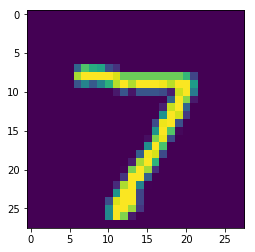

In [15]:
plt.imshow(test_x[0])
plt.show()

In [14]:
print(numpy.argmax(model.predict(test_x[0][numpy.newaxis,:,:,numpy.newaxis])))

7
